## This google colab notebook introduces basic Image Processing Methods such as Image Histogram, Intensity Transformation, Thresholding and Filtering. Use the following drive link to access the images.
https://drive.google.com/open?id=1QC910Yh70rkaUm9B3fLEJQRQMCbNkw9h


## Mounting the google drive and loading requried libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

## Various ways of reading images

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')
print (I.shape)
cv2_imshow(I)

print (I[0:2][0:1])

AttributeError: ignored

(137, 137, 3)


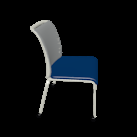

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png')
print (I.shape)
cv2_imshow(I)

(137, 137, 4)


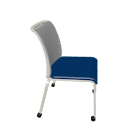

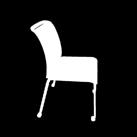

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])

(137, 137)


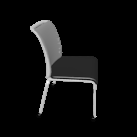

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_GRAYSCALE)
print (I.shape)
cv2_imshow(I)counts,bins = np.histogram(I.ravel(),256,[0,256])

In [0]:
I = io.imread('/content/drive/My Drive/Image Processing/chair.png')
print (I.shape)

(137, 137, 4)


In [0]:
I_lena_bw = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
print (I_lena_bw.dtype)
counts,bins = np.histogram(I.ravel(),256,[0,256])
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts,labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
fig.show()


uint8


##Function to return the histogram of image
##HW1: Write your own function instead of using np.histogram?

In [0]:
def return_histogram(I):
  if (len(I.shape) == 2 or I.shape[2] == 1):
    counts,bins = np.histogram(I.ravel(),256,[0,256])
    bins = 0.5 * (bins[:-1] + bins[1:])
    fig = px.bar(x=bins, y=counts, labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
  elif (I.shape[2] == 3):
    # Complete this part for RGB images.
    pass
  return fig




##Intensity Transformations

Is this the correct way to transform?

In [0]:
linear_shift = 45
lena_shifted1 = I_lena_bw + linear_shift

In [0]:
I = I_lena_bw.astype('int')
lena_shifted = np.clip((I + linear_shift),0,255).astype('uint8')
cv2_imshow(np.hstack([I,lena_shifted1, lena_shifted]))

# Plotting the Histogram
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.add_trace(go.Histogram(x=lena_shifted1.ravel(), name= 'Incorrect Transformation'))
fig.add_trace(go.Histogram(x=lena_shifted.ravel(), name= 'Correct Transformation'))
fig.show()

### **Ex1: Write code to perform gamma transformations for different values of gamma and plot the histograms.**
### **Report your observations.**

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg', cv2.IMREAD_GRAYSCALE)
I_new = np.zeros(I.shape, dtype='float')
print (I.shape)
for i in range(I.shape[0]):
  for j in range(I.shape[1]):
    I_new[i][j] = (I[i][j]/255)**0.5
I_new = (I_new*255).astype('uint8')
cv2_imshow(I_new)

(457, 370)


## Image Thresholding

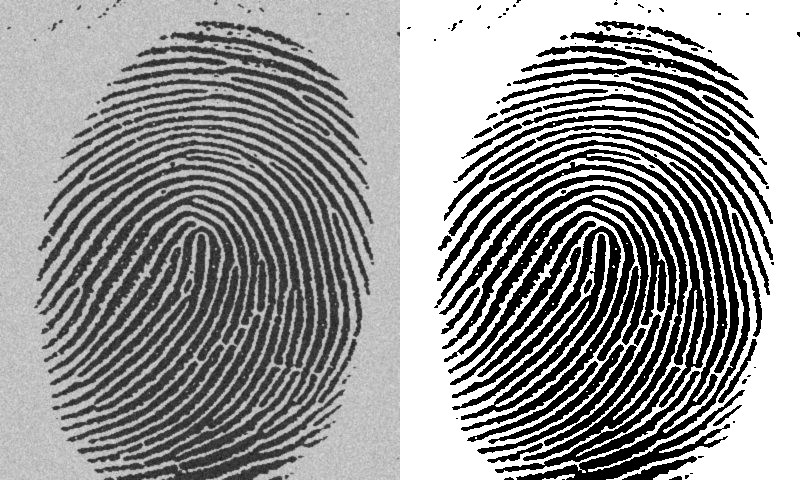

In [0]:
# Thresholding based on Histogram Values
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show()
ret,thresh1 = cv2.threshold(I,125,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([I, thresh1]))
figure = return_histogram(thresh1)
figure.show()

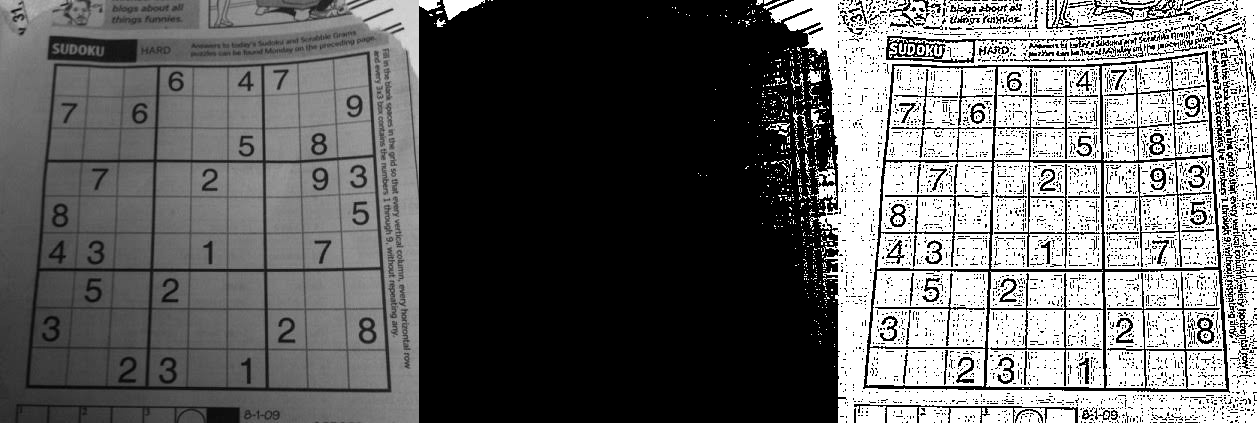

In [0]:
# Adaptive Thresholding
I = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
figure = return_histogram(I)
figure.show()
ret,thresh1 = cv2.threshold(I,150,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(I,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)
cv2_imshow(np.hstack([I, thresh1, thresh2]))

In this case as we see global thresholding does not work. Hence we use adaptive thresholding where separate threshold is defined for each pixel based on the neighbouring window around it.
### HW2: Perform thresholding and try to retrieve the mask for the text in the image 'text.jpg'

## Image Filtering

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


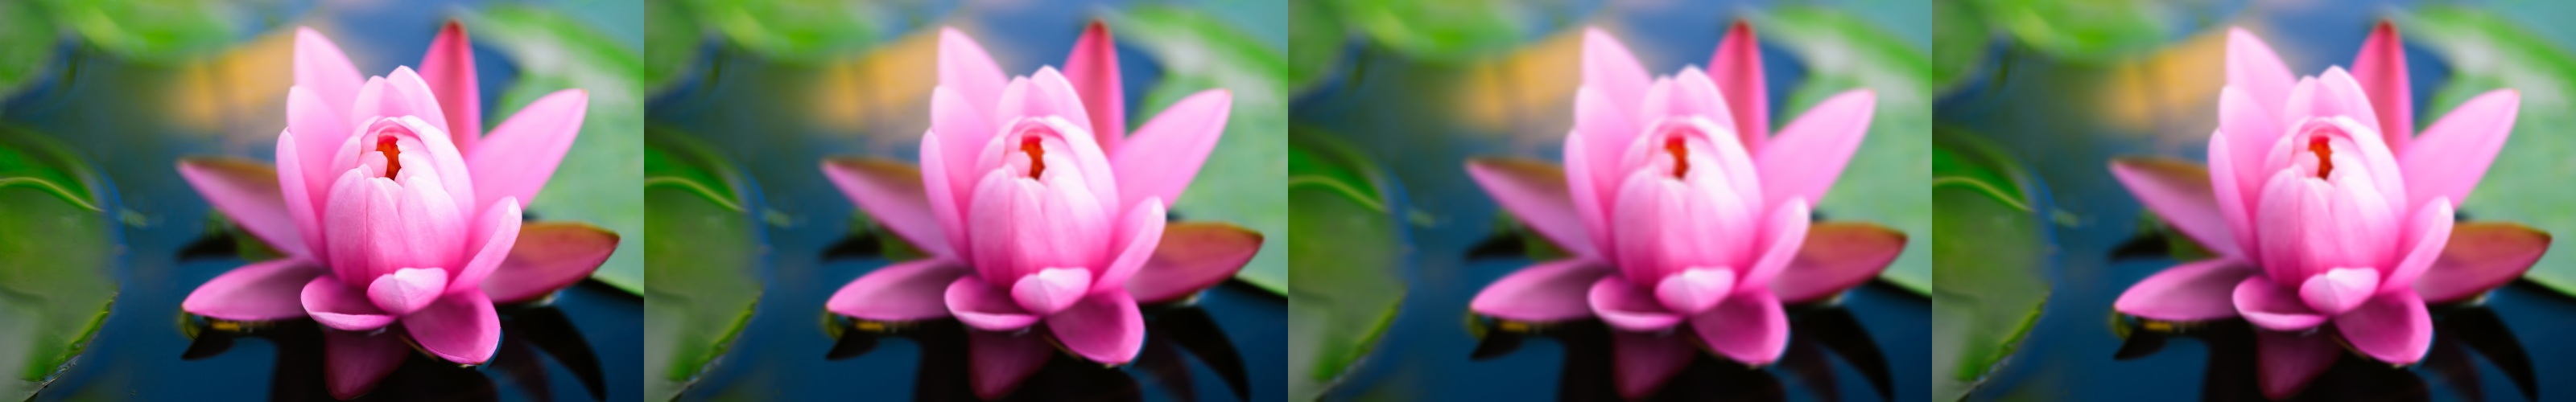

In [0]:
# Averaging or Smoothing Filter
I = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')

# Averaging Kernel of size (5,5)
kernel = np.ones((5,5),np.float32)/25
print (kernel)
filtered_image1 = cv2.filter2D(I,-1,kernel)

# Averaging Kernel of size (9,9)
filtered_image2 = cv2.blur(I,(9,9),0)
filtered_image3 = cv2.GaussianBlur(I,(9,9),0)


cv2_imshow(np.hstack([I, filtered_image1, filtered_image2,filtered_image3]))
# figure = return_histogram(I)
# figure.show()


## Ex 2: What will be the identity kernel?
## What happens if you repeatedly apply the Blurring Filter? Verify.

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/bell.jpg')
sharpening_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print (sharpening_kernel)
sharpened_image = cv2.filter2D(I,-1,sharpening_kernel)
cv2_imshow(np.hstack([I, sharpened_image]))

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


## Salt and Pepper Noise
Salt Noise is characterised by white pixels all over the image and pepper noise is characterised by black pixels spread over the image.




In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/salt_noise.png')
median = cv2.medianBlur(I,5)
cv2_imshow(np.hstack([I,median]))png

## Edge Detection Filters (Sobel Filter)

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/window.jpeg', cv2.IMREAD_GRAYSCALE)
print (I.shape)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print ('Sobel operator along x')
print (sobel_x)
filtered_image1 = cv2.filter2D(I,-1,sobel_x)
ret,filtered_image1 = cv2.threshold(filtered_image1,200,255,cv2.THRESH_BINARY)

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print ('Sobel operator along y')
print (sobel_y)
filtered_image2 = cv2.filter2D(I,-1,sobel_y)
ret,filtered_image1 = cv2.threshold(filtered_image1,200,255,cv2.THRESH_BINARY)

magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
final = np.clip((I + magnitude),0,255).astype('uint8')
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2, magnitude, final]))

(750, 500)
Sobel operator along x
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel operator along y
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


## Ex 3: Count the number of windows in image 'window.jpeg'.


## Morphological Image Processing

### Erosion and Dilation

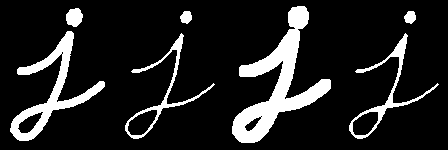

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/j.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
dilation = cv2.dilate(I,kernel,iterations = 1)
erosion2 = cv2.erode(dilation,kernel,iterations = 2)
cv2_imshow(np.hstack([I,erosion1,dilation,erosion2]))

### Opening and Closing - Fingerprint Problem

[[1 1 1]
 [1 1 1]
 [1 1 1]]


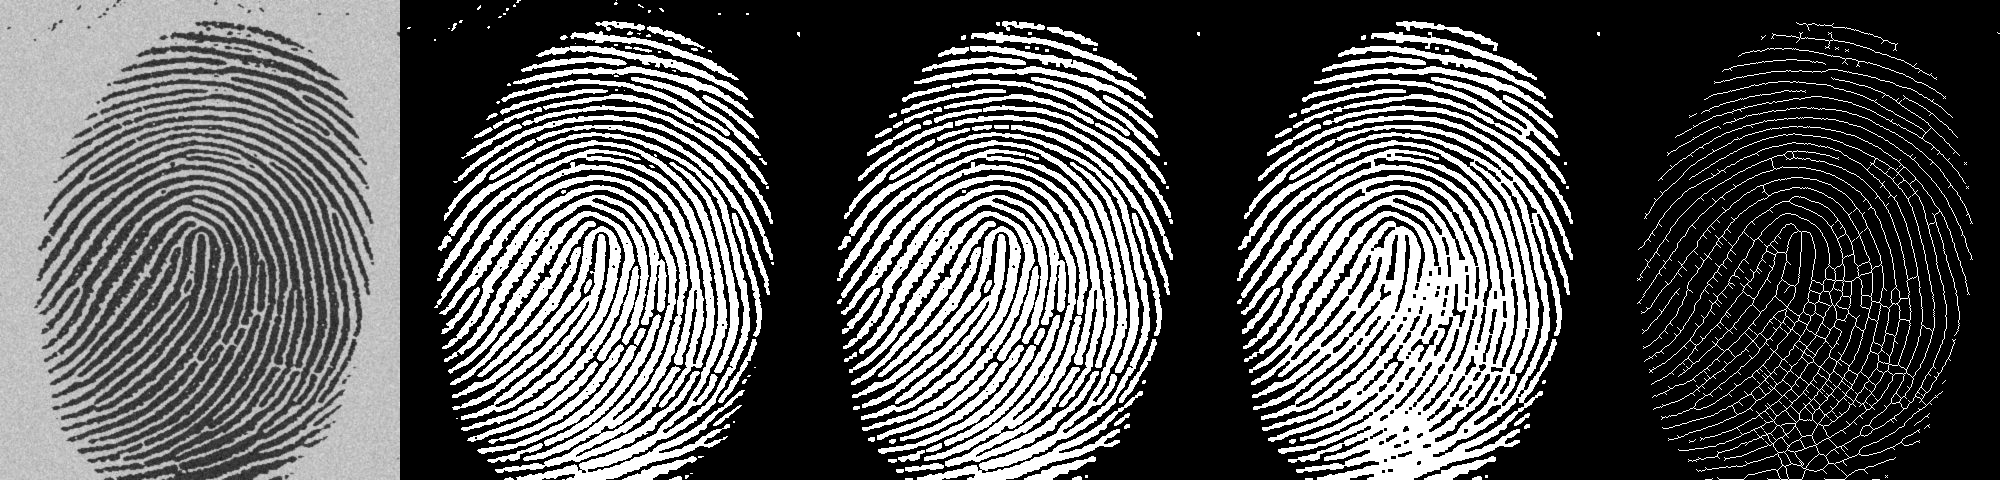

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
ret,binary = cv2.threshold(I,125,255,cv2.THRESH_BINARY_INV)
se = morp.square(3,dtype='uint8')
print (se)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, se)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, se)
closing2 = closing/255
final = morp.medial_axis(closing2)*255
cv2_imshow(np.hstack([I, binary, opening, closing, final]))

### Ex 4: Write a script which reads 'coin.jpg' as input and outputs a new image containing:

### only the coins touching the boundary of the image

### only non-overlapping coins. Count such coins.

### only the coins which overlap with each other. Count such coins.



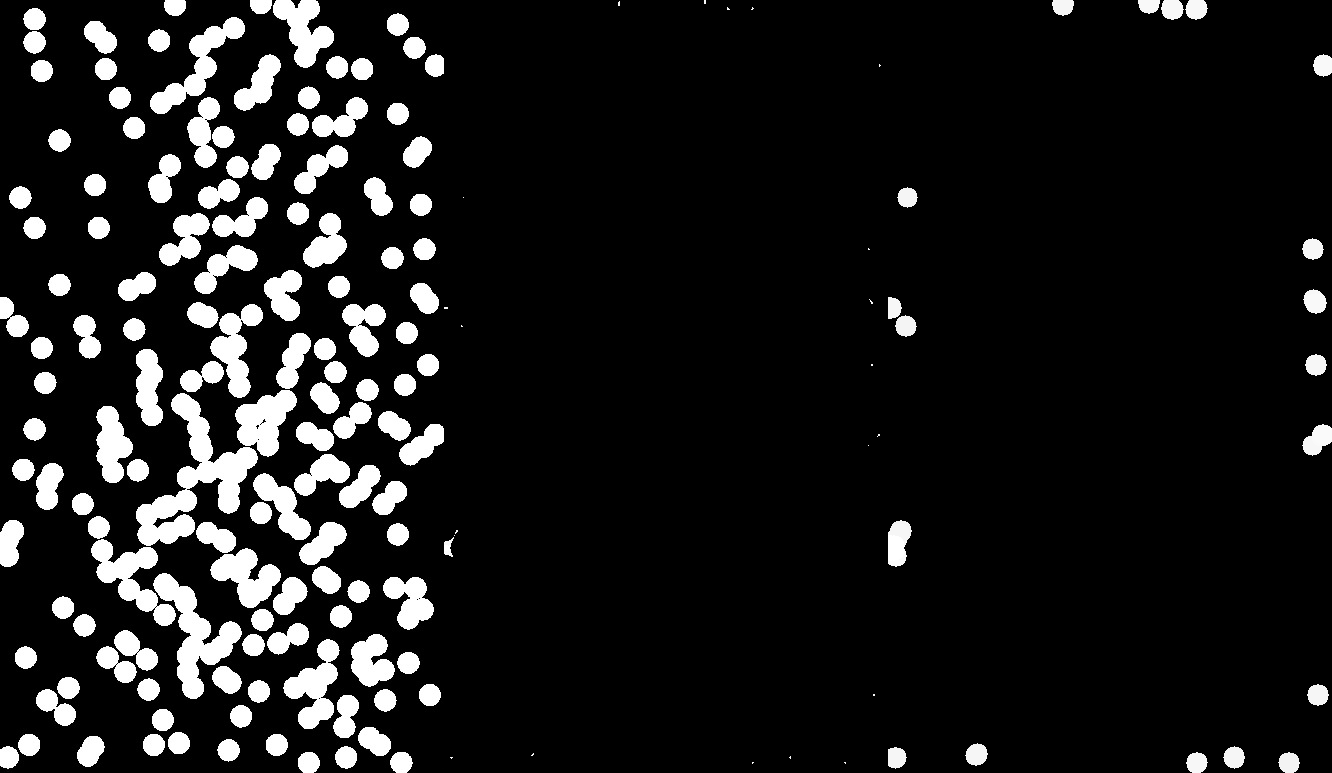

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)

se = morp.disk(10)
I1 = cv2.erode(I, se)
# cv2_imshow(I1)
I1[10:I1.shape[0] - 20, 20:I1.shape[1] - 20] = 0
I2 = cv2.dilate(I1, se)
cv2_imshow(np.hstack([I, I1, I2]))


### HW: Read the image 'objects.png' and try to answer the following questions using code


#### How many objects have one or more holes?
#### How many square objects are in the image?
#### Identify the square objects that have holes.
#### Identify the circular objects that have no holes

### HW: Write a script which takes the image 'text2.png' as input and outputs the number of components for each of the five colors. Note that the components may be non-letters (e.g. . and |) Use thresholding and connected components to solve this.